In [7]:
source('../NMEG_utils/r_functions/load_nmeg.r')
library('xts')

In [8]:
seg <- daily_to_xts(get_daily_file('Seg', 'aflx', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', 'aflx', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', 'aflx', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', 'aflx', make_new=FALSE))

In [34]:
seg_s <- daily_to_xts(get_daily_file('Seg', 'soilmet', make_new=FALSE))
ses_s <- daily_to_xts(get_daily_file('Ses', 'soilmet', make_new=FALSE))
wjs_s <- daily_to_xts(get_daily_file('Wjs', 'soilmet', make_new=FALSE))
mpj_s <- daily_to_xts(get_daily_file('Mpj', 'soilmet', make_new=FALSE))

In [43]:
get_decomp <- function(dframe, fun, site='Site ts decomp', per=52, plotdecomp=TRUE){
    #ts1 <- apply.weekly(dframe, fun)
    ts1 <- dframe
    attr(ts1, 'frequency') <- 365
    # Timeseries decomp
    decomp_ts1 <- stl(as.ts(ts1), s.window="per", na.action=na.omit, robust=TRUE)
    if (plotdecomp==TRUE){ plot(decomp_ts1, main=site)}
    # Not sure why making a zoo first is needed
    decomp <- as.xts(zoo(decomp_ts1$time.series, index(dframe)))
    return(decomp)
}

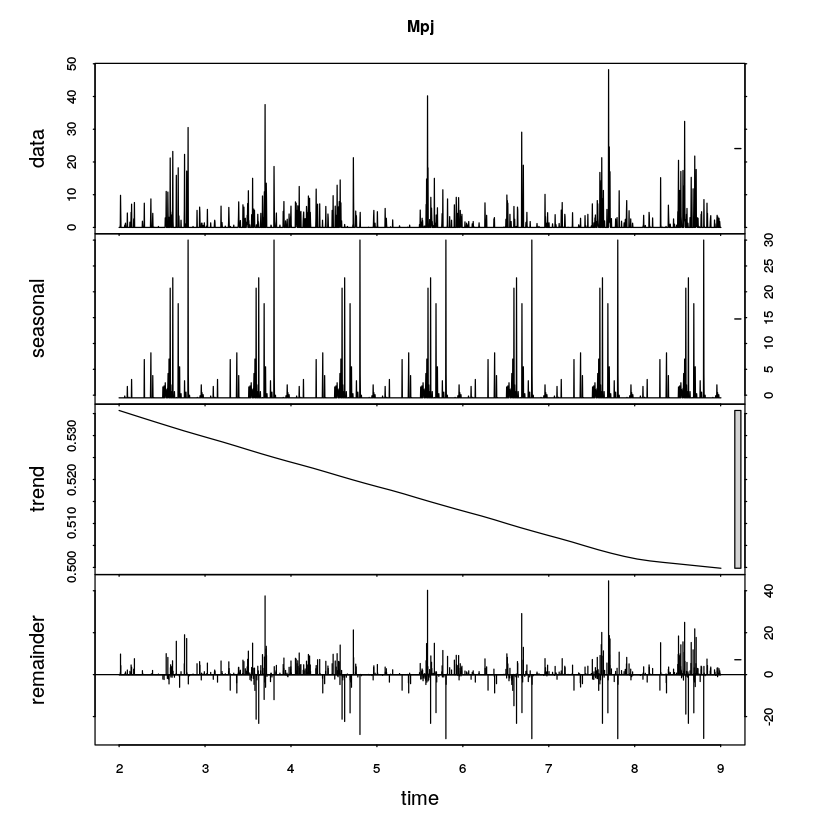

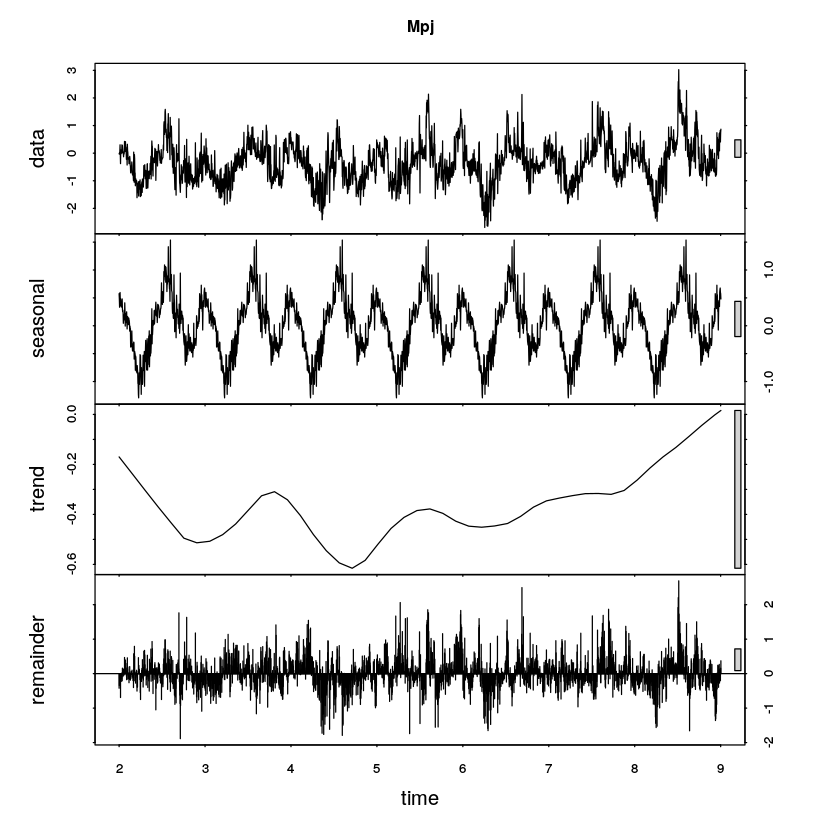

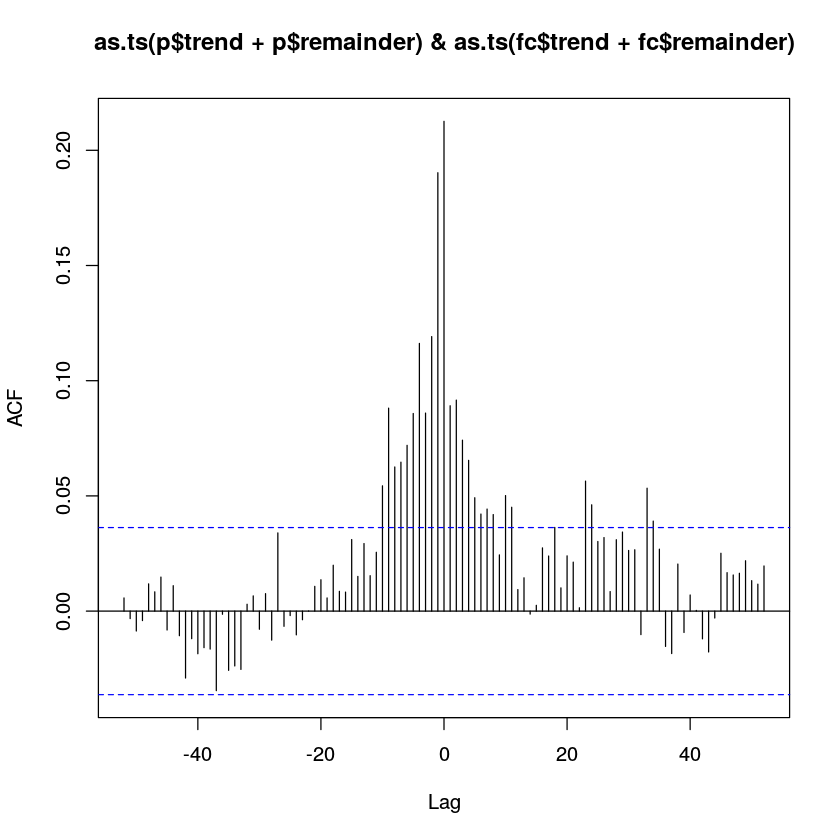

In [45]:
p <- get_decomp(mpj$P_F, sum, site='Mpj')
fc <- get_decomp(mpj$FC_F_g_int, mean, site='Mpj')
ccf(as.ts(p$trend + p$remainder), as.ts(fc$trend+fc$remainder), lag.max=52, na.action=na.omit)

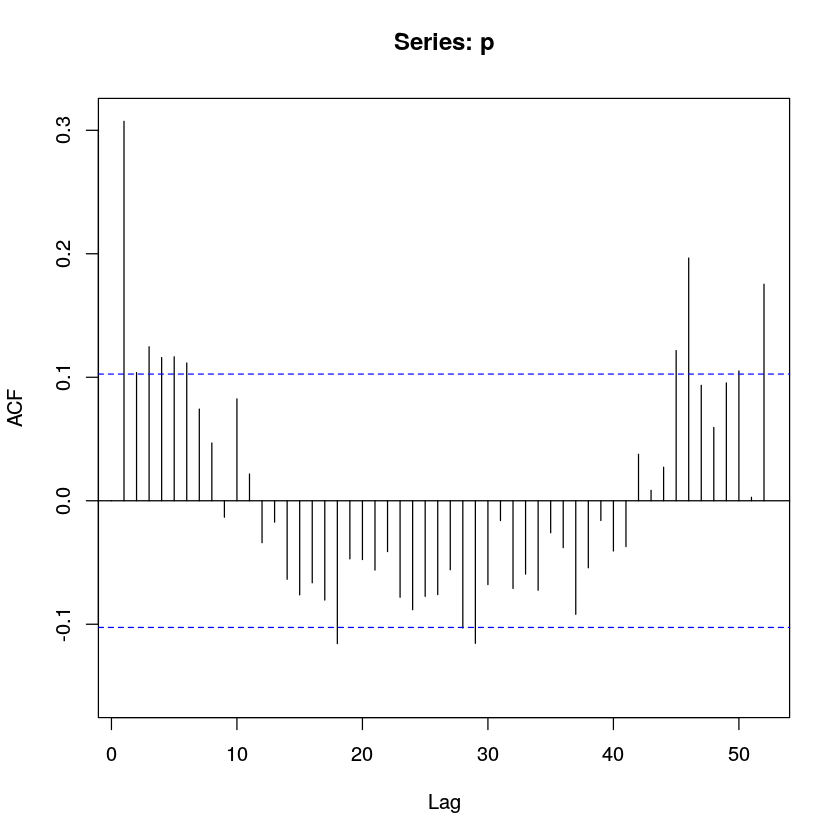


Call:
arima(x = p, order = c(1, 0, 0), xreg = time(p))

Coefficients:
         ar1  intercept  time(p)
      0.3066     0.6712    3e-04
s.e.  0.0498    14.7876    1e-03

sigma^2 estimated as 91.19:  log likelihood = -1341.58,  aic = 2691.16

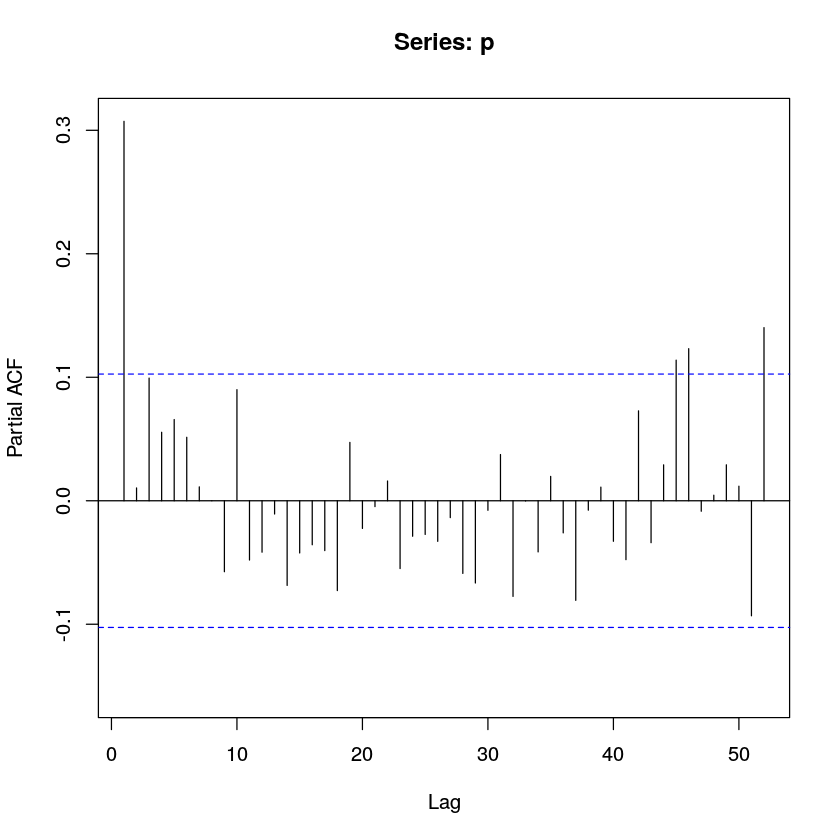

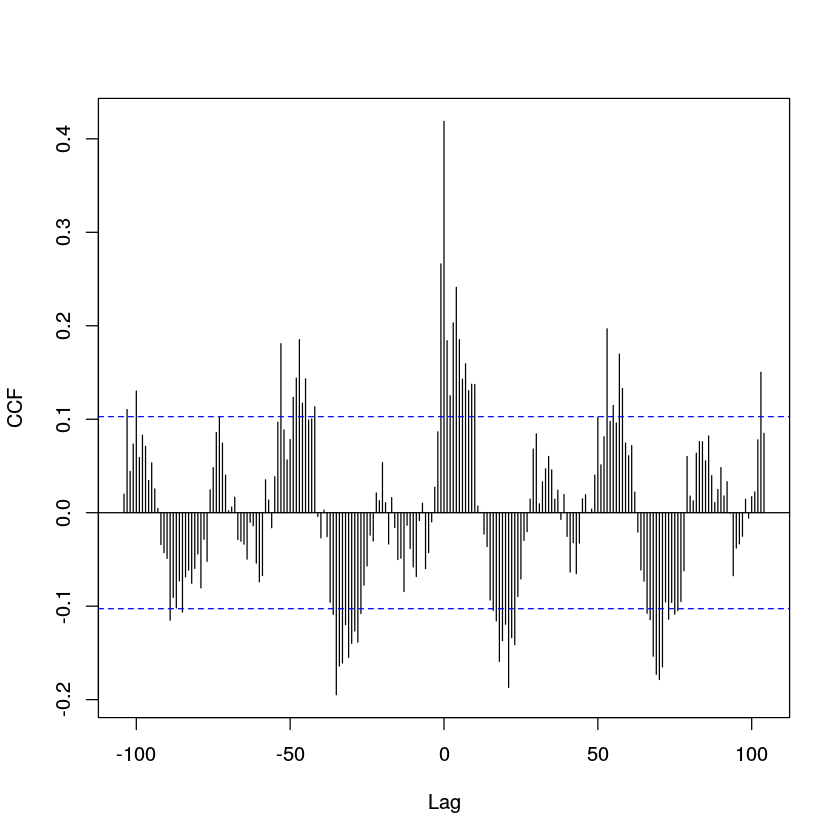

In [32]:
#library(astsa)
#acf2(mpj$P_F[366:nrow(mpj)])
p <- apply.weekly(mpj$P_F, sum)
p <- p[54:nrow(p)]
fc <- apply.weekly(mpj$FC_F_g_int, mean)
fc <- fc[54:nrow(fc)]
Acf(p, lag.max=52)
Pacf(p, lag.max=52)
(fit = arima(p, xreg=time(p), order=c(1, 0, 0)))
ar1 = as.numeric(fit$coef[1]) # = 0.8272
p.pw = resid(fit)
fc.d = resid(lm(fc~time(fc), na.action=NULL))
fc.fil = filter(fc.d, filter=c(1, -ar1), method="conv", sides=1)
ccf(p.pw, fc.fil, lag.max=104, main="", ylab="CCF", na.action=na.omit)

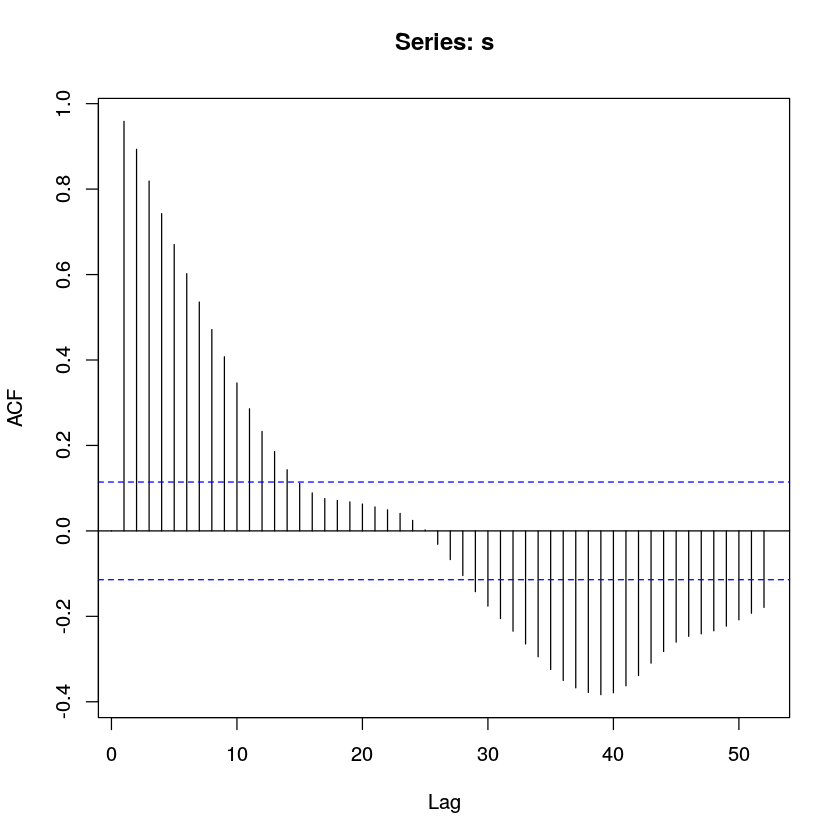


Call:
arima(x = s, order = c(1, 0, 0), xreg = time(s))

Coefficients:
      ar1  intercept  time(s)
        1     0.4568    0e+00
s.e.    0  1456.7935    8e-04

sigma^2 estimated as 0.004341:  log likelihood = 381.97,  aic = -755.94

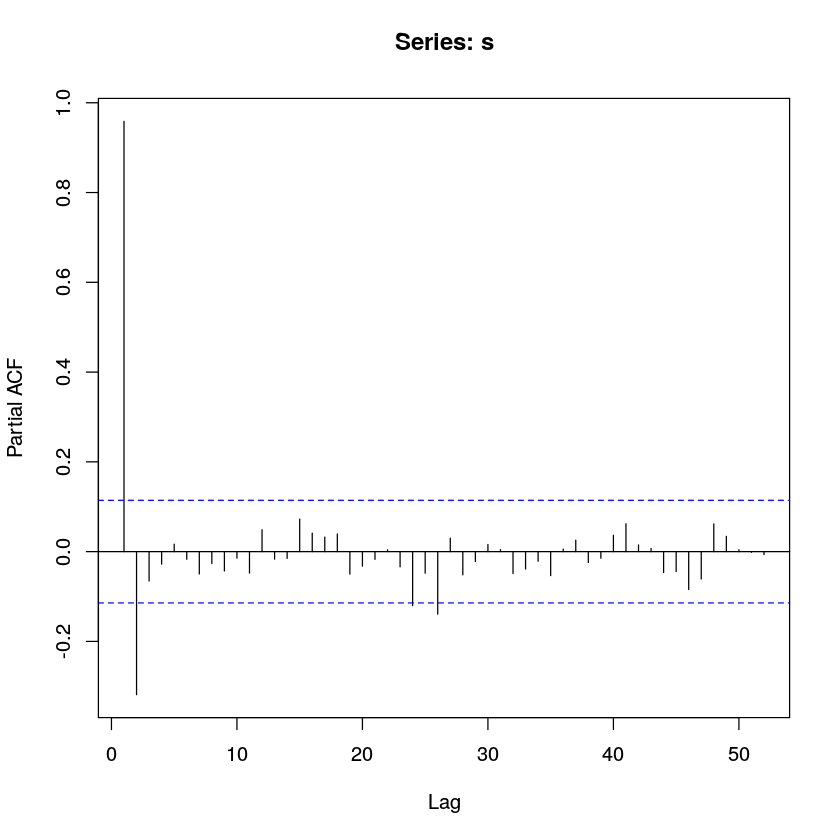

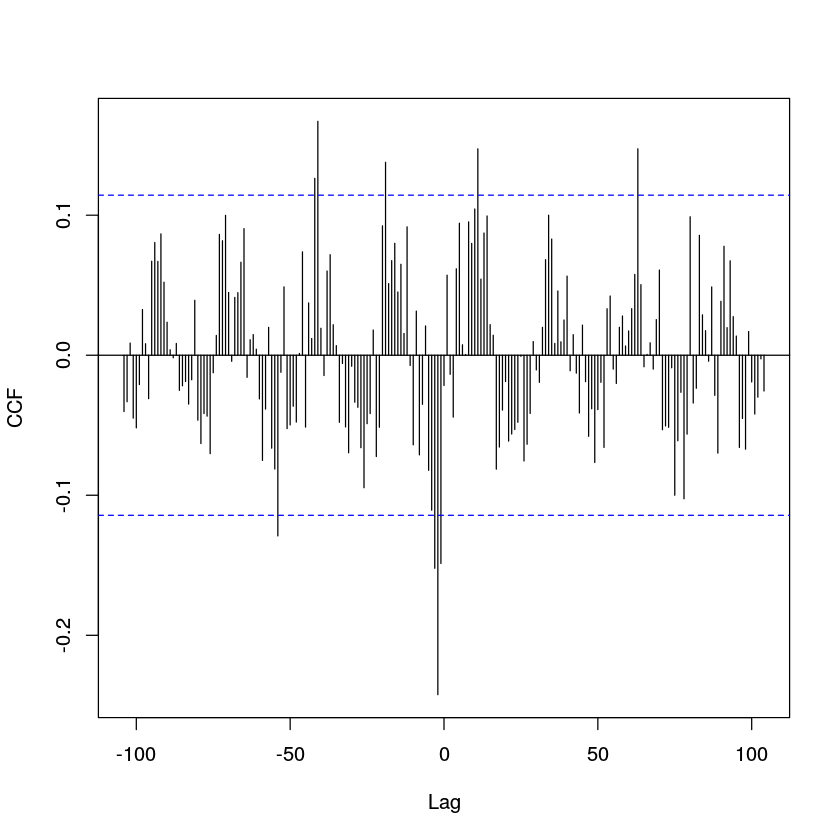

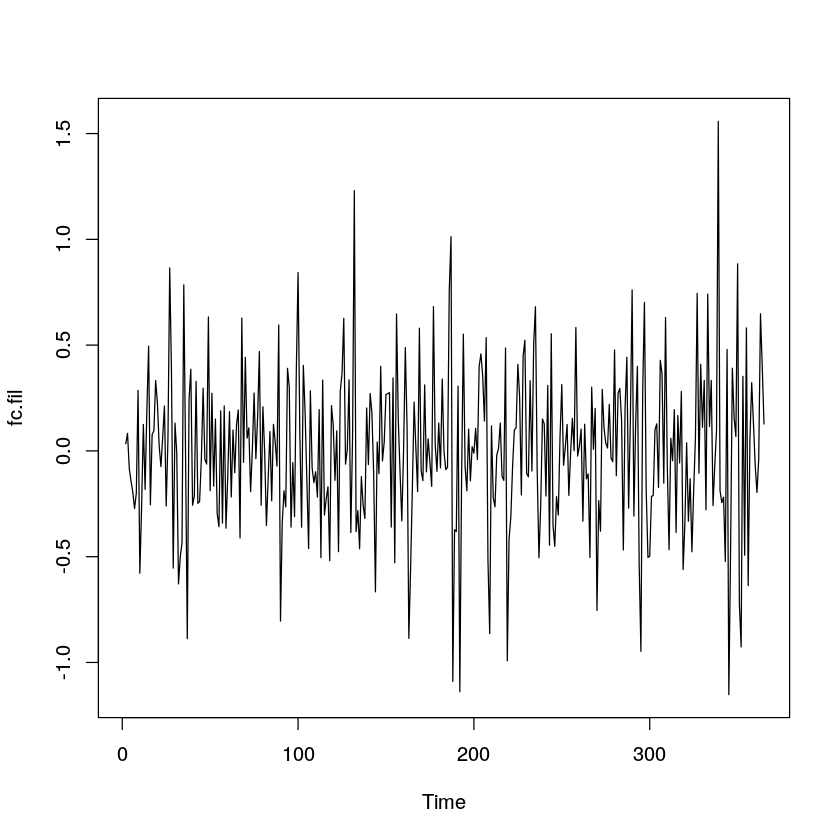

In [51]:
#library(astsa)

s <- apply.weekly(mpj_s$deep_swc_interp, sum)
s <- s[54:nrow(s)]
fc <- apply.weekly(mpj$FC_F_g_int, mean)
fc <- fc[54:nrow(fc)]
Acf(s, lag.max=52)
Pacf(s, lag.max=52)
(fit = arima(s, xreg=time(s), order=c(1, 0, 0)))
ar1 = as.numeric(fit$coef[1]) # = 0.8272
s.pw = resid(fit)
fc.d = resid(lm(fc~time(fc), na.action=NULL))
fc.fil = filter(fc.d, filter=c(1, -ar1), method="conv", sides=1)
ccf(s.pw, fc.fil, lag.max=104, main="", ylab="CCF", na.action=na.omit)